In [2]:
#importing all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [3]:
#importing data from file location
df = pd.read_csv (r"C:\Users\tdero\Documents\Datasets\student-mat.csv", sep=";")

In [4]:
#data cleaning
del df['Dalc']
del df['Walc']

#setting the final test score to be wither pass or fail
for index, row in df.iterrows():
    if(df['G3'].values[index] >= 10):
        df['G3'].values[index] =1
    else:
        df['G3'].values[index] =0

#replacig nominal data with numerical binary data
for index, row in df.iterrows():
    if(df['sex'].values[index] =='M'):
        df['sex'].values[index] = 1
    else:
        df['sex'].values[index] =0
        
for index, row in df.iterrows():
    if(df['address'].values[index] == "R"):
        df['address'].values[index] =1
    else:
        df['address'].values[index] =0
        
for index, row in df.iterrows():
    if(df['famsize'].values[index] == "LE3"):
        df['famsize'].values[index] =1
    else:
        df['famsize'].values[index] =0
        
for index, row in df.iterrows():
    if(df['Pstatus'].values[index] =='T'):
        df['Pstatus'].values[index] =1
    else:
        df['Pstatus'].values[index] =0
        
for index, row in df.iterrows():
    if(df['schoolsup'].values[index] == "yes"):
        df['schoolsup'].values[index] =1
    else:
        df['schoolsup'].values[index] =0
        
for index, row in df.iterrows():
    if(df['famsup'].values[index] == "yes"):
        df['famsup'].values[index] =1
    else:
        df['famsup'].values[index] =0
        
for index, row in df.iterrows():
    if(df['paid'].values[index] == "yes"):
        df['paid'].values[index] =1
    else:
        df['paid'].values[index] =0
        
for index, row in df.iterrows():
    if(df['activities'].values[index] == "yes"):
        df['activities'].values[index] =1
    else:
        df['activities'].values[index] =0
        
for index, row in df.iterrows():
    if(df['nursery'].values[index] == "yes"):
        df['nursery'].values[index] =1
    else:
        df['nursery'].values[index] =0
        
for index, row in df.iterrows():
    if(df['higher'].values[index] == "yes"):
        df['higher'].values[index] =1
    else:
        df['higher'].values[index] =0
        
for index, row in df.iterrows():
    if(df['internet'].values[index] == "yes"):
        df['internet'].values[index] =1
    else:
        df['internet'].values[index] =0
        
for index, row in df.iterrows():
    if(df['romantic'].values[index] == "yes"):
        df['romantic'].values[index] =1
    else:
        df['romantic'].values[index] =0
        
for index, row in df.iterrows():
    if(df['school'].values[index] == "MS"):
        df['school'].values[index] =1
    else:
        df['school'].values[index] =0
        
#converting categorical data into numeric
df['Fjob'] = df['Fjob'].astype('category')
df['Fjob'] = df['Fjob'].cat.codes

df['Mjob'] = df['Mjob'].astype('category')
df['Mjob'] = df['Mjob'].cat.codes

df['reason'] = df['reason'].astype('category')
df['reason'] = df['reason'].cat.codes

df['guardian'] = df['guardian'].astype('category')
df['guardian'] = df['guardian'].cat.codes

In [5]:
#splittling the data into input and output features
X = df.iloc[:, :-1].values
Y = df.iloc[:,-1].values

In [6]:
#splitting the testing and trianing data witha 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [7]:
#initializing a random forest classifier with 128 decision trees
rfc = RandomForestClassifier(n_estimators=128)
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)

In [8]:
print("CLassification report: " , classification_report(y_test, rfc_predict))
rfc_cv_score = cross_val_score(rfc, X, Y, cv=10, scoring='roc_auc')
print("Cross validated score: ", rfc_cv_score.mean())
#Accuracy of classifier
print("Accuracy score: ", accuracy_score(y_test, rfc_predict))


CLassification report:                precision    recall  f1-score   support

           0       0.83      0.90      0.86        21
           1       0.96      0.93      0.95        58

    accuracy                           0.92        79
   macro avg       0.90      0.92      0.91        79
weighted avg       0.93      0.92      0.93        79

Cross validated score:  0.970140258601797
Accuracy score:  0.9240506329113924


Feature: school, Score:0.00435
Feature: sex, Score:0.00733
Feature: age, Score:0.03035
Feature: address, Score:0.00884
Feature: famsize, Score:0.01011
Feature: Pstatus, Score:0.00472
Feature: Medu, Score:0.01688
Feature: Fedu, Score:0.01805
Feature: Mjob, Score:0.01884
Feature: Fjob, Score:0.01916
Feature: reason, Score:0.01767
Feature: guardian, Score:0.01506
Feature: traveltime, Score:0.01190
Feature: studytime, Score:0.01456
Feature: failures, Score:0.03406
Feature: schoolsup, Score:0.00873
Feature: famsup, Score:0.00800
Feature: paid, Score:0.00836
Feature: activities, Score:0.01059
Feature: nursery, Score:0.00721
Feature: higher, Score:0.00354
Feature: internet, Score:0.00613
Feature: romantic, Score:0.01254
Feature: famrel, Score:0.01802
Feature: freetime, Score:0.02089
Feature: goout, Score:0.02814
Feature: health, Score:0.01857
Feature: absences, Score:0.04903
Feature: G1, Score:0.23077
Feature: G2, Score:0.33764


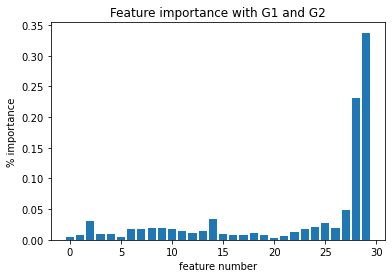

In [15]:
#plot of feature importance
importance = rfc.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %s, Score:%.5f' % (df.columns[i],v))
plt.bar([x for x in range(len(importance))], importance)
plt.title("Feature importance with G1 and G2")
plt.ylabel("% importance")
plt.xlabel("feature number")
plt.show()

In [10]:
#make a cpoy of original dataset so Random Forest algorithm can be applied without G1 and G2 scores
df2 = df.copy()

In [11]:
del df2['G2']
del df2['G1']

In [12]:
#input and output data selected, random forest applied to split train and test data, accuracy scores printed
X_rfc = df2.iloc[:, :-1].values
Y_rfc = df2.iloc[:,-1].values

X_train_rfc, X_test_rfc, y_train_rfc, y_test_rfc = train_test_split(X_rfc, Y_rfc, test_size=0.2)

rfc2 = RandomForestClassifier(n_estimators=128)
rfc2.fit(X_train_rfc,y_train_rfc)
rfc2_predict = rfc2.predict(X_test_rfc)

print("Classification report: ", classification_report(y_test_rfc, rfc2_predict))

rfc_cv_score2 = cross_val_score(rfc2, X_rfc, Y_rfc, cv=10, scoring='roc_auc')
print("Cross_validated score: ", rfc_cv_score2.mean())

print("Accuracy score: ", accuracy_score(y_test_rfc, rfc2_predict))


Classification report:                precision    recall  f1-score   support

           0       0.80      0.18      0.30        22
           1       0.76      0.98      0.85        57

    accuracy                           0.76        79
   macro avg       0.78      0.58      0.58        79
weighted avg       0.77      0.76      0.70        79

Cross_validated score:  0.6614781941705019
Accuracy score:  0.759493670886076


Feature: school, Score:0.01307
Feature: sex, Score:0.02024
Feature: age, Score:0.05881
Feature: address, Score:0.01853
Feature: famsize, Score:0.01840
Feature: Pstatus, Score:0.00983
Feature: Medu, Score:0.04788
Feature: Fedu, Score:0.04161
Feature: Mjob, Score:0.04597
Feature: Fjob, Score:0.04246
Feature: reason, Score:0.04341
Feature: guardian, Score:0.02903
Feature: traveltime, Score:0.02635
Feature: studytime, Score:0.04017
Feature: failures, Score:0.08108
Feature: schoolsup, Score:0.02177
Feature: famsup, Score:0.01789
Feature: paid, Score:0.02092
Feature: activities, Score:0.02176
Feature: nursery, Score:0.01748
Feature: higher, Score:0.02262
Feature: internet, Score:0.01859
Feature: romantic, Score:0.02291
Feature: famrel, Score:0.04714
Feature: freetime, Score:0.05067
Feature: goout, Score:0.06434
Feature: health, Score:0.04868
Feature: absences, Score:0.08839


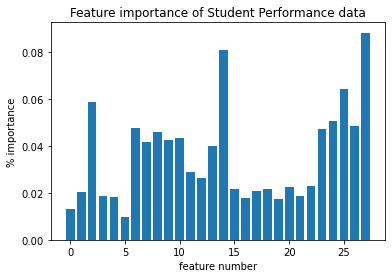

In [16]:
#feature importance applied and plot of important features shown
importance2 = rfc2.feature_importances_
for i,v in enumerate(importance2):
    print('Feature: %s, Score:%.5f' % (df2.columns[i],v))
plt.bar([x for x in range(len(importance2))], importance2)
plt.title("Feature importance of Student Performance data")
plt.ylabel("% importance")
plt.xlabel("feature number")
plt.show()